### Feature selection process

In [13]:
import pandas as pd
from package_toolbox.subpackage_preprocessingtools import Processed_Data as proc
import numpy as np
from sklearn.model_selection import train_test_split
from pyts.classification import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

### Get Data

In [3]:
# If we have to use 1730 later, we just have to put '1730' as argument
List_of_matfiles = proc.get_filelist_from_48k_and_Normal_Data('1750')

In [4]:
Normal_and_48k_data_1750_dict = proc.get_all_matfiles_as_dict(List_of_matfiles)

### 1) Statistical features of DE_Time

In [5]:
# This method returns y and X at the same time!
# If you want FE_Time, write FE_Time in argument instead of DE_Time
y_stat, X_stat = proc.get_stat_features_as_df(Normal_and_48k_data_1750_dict,'DE_time')

Split dataset

In [6]:
X_strain, X_stest, y_strain, y_stest = train_test_split(X_stat, y_stat, test_size= 0.3 , random_state = 42,stratify=y_stat)

Train and print score

In [7]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_strain, y_strain)
print(clf.score(X_stest,y_stest))

/tmp/ipykernel_2674/445557044.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_strain, y_strain)


0.90304396843292


Sequential Forward Selection

In [8]:
# Sequential Forward Selection(sfs)
sfs = SFS(clf,
          k_features=8,
          forward=True,
          scoring = 'accuracy',
          
          )
sfs.fit(X_strain, y_strain)

/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=8,
                                                           random_state=0),
                          k_features=8, scoring='accuracy')

In [9]:
sfs.k_feature_names_

('Max', 'Min', 'std', 'var', 'mean', 'median', 'skew', 'kurt')

In [10]:
sfs.k_score_

0.8873963341170417

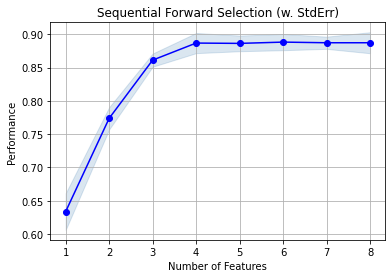

In [14]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### --> Max. ca. 0.88- 0.89

### 2) Statistical features of FE_Time

In [16]:
# This method returns y and X at the same time!
# If you want FE_Time, write FE_Time in argument instead of DE_Time
y_stat, X_stat = proc.get_stat_features_as_df(Normal_and_48k_data_1750_dict,'FE_time')

Split dataset

In [17]:
X_strain, X_stest, y_strain, y_stest = train_test_split(X_stat, y_stat, test_size= 0.3 , random_state = 42,stratify=y_stat)

Train and print score

In [18]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_strain, y_strain)
print(clf.score(X_stest,y_stest))

/tmp/ipykernel_2674/2198672964.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_strain, y_strain)


0.6910935738444194


Sequential Forward Selection

In [19]:
# Sequential Forward Selection(sfs)
sfs = SFS(clf,
          k_features=8,
          forward=True,
          scoring = 'accuracy',
          
          )
sfs.fit(X_strain, y_strain)


/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=8,
                                                           random_state=0),
                          k_features=8, scoring='accuracy')

In [20]:
sfs.k_feature_names_

('Max', 'Min', 'std', 'var', 'mean', 'median', 'skew', 'kurt')

In [21]:
sfs.k_score_

0.6863307248716239

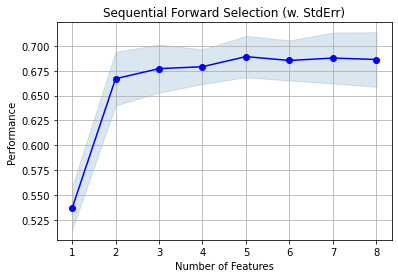

In [22]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### --> Max. ca. 0.68

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3) Statistical features of DE_Time and FE_Time in combination

Load Data

In [16]:
y_stat_DE, X_stat_DE = proc.get_stat_features_as_df(Normal_and_48k_data_1750_dict,'DE_time')
y_stat_FE, X_stat_FE = proc.get_stat_features_as_df(Normal_and_48k_data_1750_dict,'FE_time')
X_stat_DE.columns = ['Max_DE','Min_DE','std_DE','var_DE','mean_DE','median_DE','skew_DE','kurt_DE']
X_stat_FE.columns = ['Max_FE','Min_FE','std_FE','var_FE','mean_FE','median_FE','skew_FE','kurt_fE']
X_stat_total = pd.concat([X_stat_DE,X_stat_FE],axis = 1)
X_stat_total

Max_DE    Min_DE    std_DE    var_DE   mean_DE  median_DE   skew_DE  \
0     0.515906 -0.492750  0.154700  0.023932  0.015390   0.016063 -0.048471   
1     0.546990 -0.472097  0.143653  0.020636  0.013343   0.005528  0.119170   
2     0.378846 -0.318556  0.124599  0.015525  0.013999   0.007614  0.049322   
3     0.398664 -0.393449  0.149990  0.022497  0.012194   0.013351 -0.104494   
4     0.396995 -0.394700  0.134347  0.018049  0.012247   0.011474 -0.036369   
...        ...       ...       ...       ...       ...        ...       ...   
2951  0.175446 -0.185668  0.062469  0.003902  0.010454   0.012726 -0.197579   
2952  0.227182 -0.187545  0.062417  0.003896  0.011645   0.012204 -0.041639   
2953  0.185250 -0.161260  0.059234  0.003509  0.009750   0.012100 -0.125348   
2954  0.194847 -0.174820  0.062803  0.003944  0.010588   0.011891 -0.042204   
2955  0.189214 -0.228017  0.064166  0.004117  0.011246   0.013143 -0.148870   

       kurt_DE    Max_FE    Min_FE    std_FE    var_FE   mean_FE  median_FE  \
0     0.481565  0.337973 -0.259900  0.091709  0.008410  0.033602   0.034722   
1     0.138696  0.329138 -0.270995  0.100226  0.010045  0.032566   0.036160   
2    -0.359829  0.324207 -0.230520  0.099255  0.009851  0.033441   0.032256   
3    -0.276550  0.306744 -0.280445  0.091888  0.008443  0.033134   0.035749   
4    -0.124221  0.290924 -0.213056  0.085397  0.007293  0.032961   0.033797   
...        ...       ...       ...       ...       ...       ...        ...   
2951 -0.186219  0.266064 -0.165185  0.066154  0.004376  0.030509   0.028353   
2952  0.084160  0.214905 -0.136833  0.060817  0.003699  0.031969   0.030613   
2953 -0.317762  0.249216 -0.154296  0.065121  0.004241  0.031558   0.029894   
2954 -0.069515  0.241204 -0.138682  0.063386  0.004018  0.034508   0.031024   
2955 -0.134844  0.270173 -0.127382  0.065116  0.004240  0.034820   0.031640   

       skew_FE   kurt_fE  
0    -0.105284 -0.025134  
1    -0.106684  0.018303  
2     0.088028 -0.391868  
3    -0.158470  0.077905  
4     0.040521 -0.140317  
...        ...       ...  
2951  0.128334 -0.017145  
2952  0.138276 -0.175006  
2953  0.099439 -0.204756  
2954  0.204721 -0.218391  
2955  0.233728 -0.018725  

[2956 rows x 16 columns]

Split dataset

In [ ]:
X_strain, X_stest, y_strain, y_stest = train_test_split(X_stat_total, y_stat_DE, test_size= 0.3 , random_state = 42,stratify=y_stat)

Train and print score

In [18]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_strain, y_strain)
print(clf.score(X_stest,y_stest))

/tmp/ipykernel_3141/3467992341.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_strain, y_strain)


0.9267192784667418


Sequential Forward Selection

In [19]:
# Sequential Forward Selection(sfs)
sfs = SFS(clf,
          k_features=16,
          forward=True,
          scoring = 'accuracy',
          
          )
sfs.fit(X_strain, y_strain)

/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/niki/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=8,
                                                           random_state=0),
                          k_features=16, scoring='accuracy')

In [20]:
sfs.k_score_

0.914943093425039

In [21]:
sfs.k_feature_names_

('Max_DE',
 'Min_DE',
 'std_DE',
 'var_DE',
 'mean_DE',
 'median_DE',
 'skew_DE',
 'kurt_DE',
 'Max_FE',
 'Min_FE',
 'std_FE',
 'var_FE',
 'mean_FE',
 'median_FE',
 'skew_FE',
 'kurt_fE')

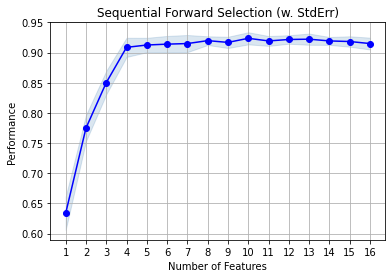

In [25]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### --> Max. ca. 0.92- 0.93